In [1]:
pwd

'/home/vikas'

In [100]:
cd /home/vikas/Documents/datasets

/home/vikas/Documents/datasets


In [101]:
ls

'A Gentle Introduction to Keras.ipynb'   cancer1.csv   heart.csv   wine.csv
 BBC.csv                                 cancer.csv    prgrm/
 BBCN.csv                                data.csv      v.csv


In [105]:
import pandas as pd

In [106]:
data=pd.read_csv('cancer1.csv',header=None)
#data

In [131]:
print(data.shape)
print("\n")
#print(data.head(5))
print(data.head(2))

(525, 32)


       0  1      2      3      4       5        6        7       8        9   \
0  842302  M  17.99  10.38  122.8  1001.0  0.11840  0.27760  0.3001  0.14710   
1  842517  M  20.57  17.77  132.9  1326.0  0.08474  0.07864  0.0869  0.07017   

    ...        22     23     24      25      26      27      28      29  \
0   ...     25.38  17.33  184.6  2019.0  0.1622  0.6656  0.7119  0.2654   
1   ...     24.99  23.41  158.8  1956.0  0.1238  0.1866  0.2416  0.1860   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  

[2 rows x 32 columns]


In [132]:
x=data.iloc[:,2:].values
y=data.iloc[:,1].values

In [133]:
print(x.shape)
print()
print(y.shape)

(525, 30)

(525,)


In [134]:
import numpy as np
print(np.unique(y))

['B' 'M']


In [135]:
print(data.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64


In [136]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(np.unique(y))

[0 1]


In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
#pipe_lr=Pipeline([('std',StandardScaler()),
                  #('pca',PCA()),
                  #('lr',LogisticRegression(penalty='l1'))])

In [139]:
model=[LogisticRegression(),LogisticRegression(penalty='l1'),LogisticRegression(penalty='l2')]
label=['LR','LR_L1','LR_L2']
s=[]
for i in range(3):
    pipe_lr=Pipeline([('std',StandardScaler()),
                  ('pca',PCA(n_components=2)),
                  ('lr',model[i])])
    pipe_lr.fit(X_train,y_train)
    acc=pipe_lr.score(X_test,y_test)
    s.append(acc*100)
    print('Test accuracy for %s is %.2f'%(label[i],acc*100))

Test accuracy for LR is 96.20
Test accuracy for LR_L1 is 96.20
Test accuracy for LR_L2 is 96.20


/home/vikas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vikas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vikas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.0, 'Accuracy compresion')

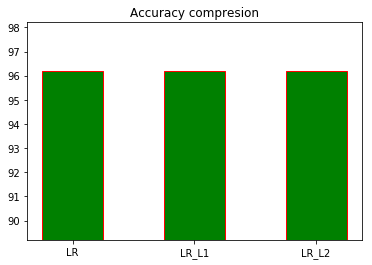

In [143]:
import matplotlib.pyplot as plt
plt.bar(label,s,edgecolor='red',facecolor='green',width=0.5)
plt.ylim(min(s)-7,max(s)+2)
plt.title('Accuracy compresion')